# 1 . Business Understanding

This dataset contains information from an open data source provided by Kaggle. It contains the Seattle airbnb data from 2017.

The questions I will be addressing in this notebook are the following:
1. What property types are the most desirable for Seattle airbnb'ers? What neighborhood is the most popular and how is price affected?
2. How does the price you pay for an airbnb change according to different factors (eg. season, holidays, etc.)?
3. What are the factors that best predict the price of a listing?

# 2. Data Understanding

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

calendar = pd.read_csv('seattle/calendar.csv')
listings = pd.read_csv('seattle/listings.csv')
reviews = pd.read_csv('seattle/reviews.csv')


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### Calendar Dataframe

In [ ]:
calendar.head()

In [4]:
# total number of rows
len(calendar)

1393570

In [5]:
# investigating number of duplicated rows
calendar.duplicated().sum()

0

In [6]:
# percent of rows with null values
calendar.isnull().sum() / len(calendar) * 100

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

For the calendar data, we will not really have to do any data preparation based on the fact that there aren't any duplicate rows and there's not much missing data. We do see some missing prices, but we will take a look at why that is later.

### Listings Dataframe

In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [8]:
# total number of rows
len(listings)

3818

In [9]:
# check for duplicate rows
listings.duplicated().sum()

0

In [20]:
# percent of data missing per column
missing_listings = pd.DataFrame(listings.isnull().sum() / len(listings) *100)
missing_listings

,0
id,0.000000
listing_url,0.000000
scrape_id,0.000000
last_scraped,0.000000
name,0.000000
summary,4.635935
space,14.903091
description,0.000000
experiences_offered,0.000000
neighborhood_overview,27.029859


Here we will have to do some data preparation becuase there are some columns where 100% of the data is missing and won't be of any help to our investigation. 

In [32]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

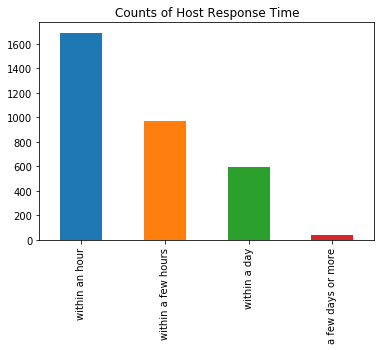

In [38]:
#look into host response rate
listings['host_response_time'].value_counts().plot(kind='bar', title='Counts of Host Response Time')

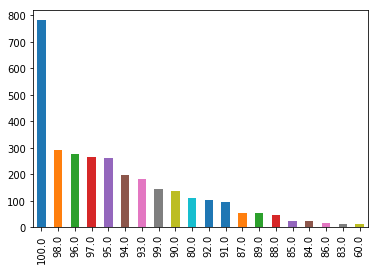

In [64]:
#Show most common 10 ratings of airbnb goers in Seattle
listings['review_scores_rating'].value_counts()[:60].plot(kind='bar')

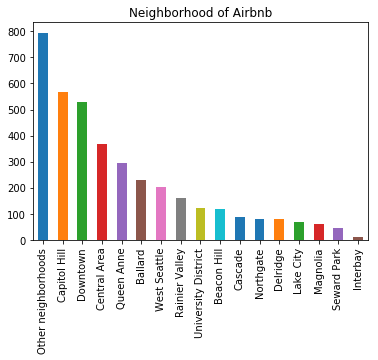

In [67]:
#look into different neighborhoods
listings['neighbourhood_group_cleansed'].value_counts().plot(kind='bar',
                                                            title='Neighborhood of Airbnb')

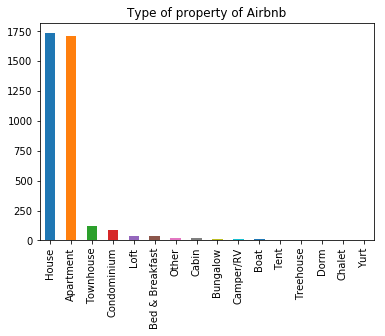

In [43]:
listings['property_type'].value_counts().plot(kind='bar', 
                                             title='Type of property of Airbnb')

Above I dug into some columns on their own just to see what information they contained. I just picked a few that I thought might be interesting.

### Reviews Dataframe

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [12]:
# total number of rows
len(reviews)

84849

In [13]:
# check for duplicates
reviews.duplicated().sum()

0

In [14]:
# percent of row that is null by column
reviews.isnull().sum() / len(reviews) * 100

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.021214
dtype: float64

I can't be sure until I combine the datasets, but I might need to delete the rows that do not contain any feedback regarding the review we gave. I will make this decision after I've combined and taken a better look at what value those reviews bring to the table. Good news is there are very few without comments, so it probably wouldn't effect our investgation much.

# 3. Prepare Data

In [29]:
missing_listings.rename(columns={0: 'percent'}, inplace=True)
missing_listings['percent'].value_counts()

0.000000      47
0.052383       9
8.381351       3
16.422211      3
13.698271      2
17.234154      2
0.026192       2
7.857517       1
100.000000     1
51.126244      1
14.903091      1
17.181771      1
4.635935       1
27.029859      1
16.946045      1
42.063908      1
0.209534       1
17.103195      1
47.380828      1
0.183342       1
20.246202      1
10.895757      1
0.419068       1
26.977475      1
60.267156      1
97.459403      1
0.157150       1
24.463070      1
17.155579      1
17.050812      1
22.498690      1
Name: percent, dtype: int64

In [31]:
#drop columns in listings df with missing data of almost 100%
listings.drop(columns=['license', 'square_feet'], inplace=True)

## prep for understanding desirable features of an airbnb such as neighborhoods

In [112]:
neighborhood_ratings = pd.DataFrame(listings.groupby(['neighbourhood_cleansed'])['review_scores_rating'].mean()).reset_index()
neighborhood_ratings = neighborhood_ratings.sort_values('review_scores_rating', ascending=False)
neighborhood_ratings[:10]#.plot(kind='bar', y='review_scores_rating', x='neighbourhood_cleansed')

,neighbourhood_cleansed,review_scores_rating
2,Arbor Heights,98.000000
64,Riverview,97.250000
73,Southeast Magnolia,97.214286
41,Madrona,97.100000
28,Harrison/Denny-Blaine,97.083333
23,Genesee,96.933333
51,North Beach/Blue Ridge,96.909091
35,Laurelhurst,96.777778
84,Whittier Heights,96.666667
54,North Delridge,96.600000


I'm showing the top 10 neighborhoods with the best average review scores rating. This would mean that these are the top 10 neighborhoods that airbnb's have the best result with based on their score. Let's look to see if this matches which of those airbnb's also have a higher cost on average.

In [116]:
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

In [123]:
neighborhood_price = pd.DataFrame(listings.groupby(['neighbourhood_cleansed'])['price'].mean()).reset_index()
neighborhood_price = neighborhood_price.sort_values('price', ascending=False)
neighborhood_price[:10]

,neighbourhood_cleansed,price
73,Southeast Magnolia,231.705882
61,Portage Bay,227.857143
83,Westlake,194.470588
81,West Queen Anne,187.769231
48,Montlake,182.789474
6,Briarcliff,176.571429
75,Sunset Hill,176.055556
32,Industrial District,173.333333
1,Alki,171.619048
85,Windermere,169.900000


There looks like there's not much correlation between ratings and prices because the top 10 are all different except for one. Southeast Magnolia shows up in both results as being a well rated neighborhood and among the toply priced. This is not what I expected. I thought that if the neighborhood had a top average rating score, that would also correlate to it being priced higher.


In [131]:
#let's look at the type of properties that are most popular and costly
listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [137]:
# look at top 10 most expensive neighborhoods
neighborhoods = ('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake', 'Briarcliff',
                'Sunset Hill', 'Industrial District', 'Alki', 'Windermere')
prop_type = ('Apartment','House')
top10_expensive = listings.loc[listings['neighbourhood_cleansed'].isin(neighborhoods)]
keep_top_prop_types = top10_expensive.loc[listings['property_type'].isin(prop_type)]

result = keep_top_prop_types.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
result

,neighbourhood_cleansed,property_type,price
0,Alki,Apartment,97.923077
1,Alki,House,210.125000
2,Briarcliff,Apartment,97.500000
3,Briarcliff,House,189.750000
4,Industrial District,Apartment,140.000000
5,Montlake,Apartment,133.333333
6,Montlake,House,191.533333
7,Portage Bay,Apartment,113.833333
8,Portage Bay,House,340.285714
9,Southeast Magnolia,Apartment,219.600000


In order to create a heatmap to see which is most costly vs. not as costly, I will have to remove the industrial district neighborhood becuase it doesn't have both house and apartment airbnb options which will mess with the heatmap implementation.

In [141]:
result.drop(result.index[4], inplace=True)
result

,neighbourhood_cleansed,property_type,price
0,Alki,Apartment,97.923077
1,Alki,House,210.125000
2,Briarcliff,Apartment,97.500000
3,Briarcliff,House,189.750000
5,Montlake,Apartment,133.333333
6,Montlake,House,191.533333
7,Portage Bay,Apartment,113.833333
8,Portage Bay,House,340.285714
9,Southeast Magnolia,Apartment,219.600000
10,Southeast Magnolia,House,234.100000


In [146]:
col_reshape = result['price'].values
col_reshape = np.reshape(col_reshape, (9,2))
col_reshape.shape

(9, 2)

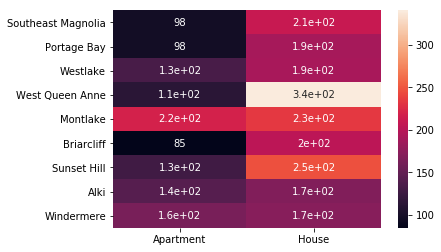

In [160]:
import seaborn as sns

neighborhoods = ['Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake', 'Briarcliff',
                'Sunset Hill', 'Alki', 'Windermere']
prop_type = ['Apartment','House']

heatmap_df = pd.DataFrame(col_reshape, index=neighborhoods, columns=prop_type)

sns.heatmap(heatmap_df, annot=True)

From the heatmap we can now see that renting a house in West Queen Anne is the most expensive choice, followed by  a house in Sunset Hill. The least expensive choice would be renting and apartment in Briarcliff or a tie for an apartment in Southeast magnolia and Portage Bay. It's interesting we can see that in West Queen Anne it's desirable to rent a house but not so much an apartment as it's very low on the heatmap. 

## prep for understanding how price changes

In [76]:
#Let's break the date into more usable time chunks like month
calendar['date'] = pd.to_datetime(calendar['date'])

In [80]:
calendar['month'] = calendar['date'].map(lambda x: x.month)
calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


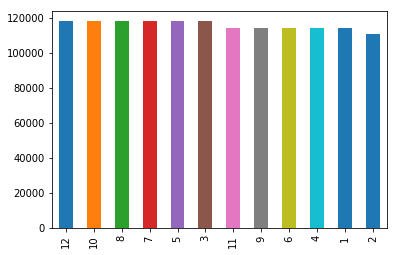

In [82]:
calendar['month'].value_counts().plot(kind='bar')

so far it doesn't really appear to be a peak season that stands out as the most popular month to come and visit an airbnb in seattle. let's see how the price is affected by month.

In [97]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

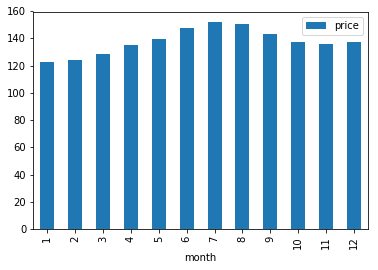

In [98]:
calendar.groupby(['month'])[['price']].mean().plot(kind='bar')

We can see here that it's the most expensive to visit Seattle during June, July, and August. Seattle's rainy season is over during those monthly so it's actually pretty nice out. That makes sense as to why an Airbnb would charge more then. You can see this is confirmed by many other websites online if you google the best time to visit Seattle. Here is an example link: https://www.tripsavvy.com/the-best-time-to-visit-seattle-4175385

## prep for understanding most predictive features

I'm first going to go through and drop some columns that seem irrelevant to our investigation of price. These features I don't see helping with our model.

In [177]:
listings_cleaned = listings.drop(columns=['id','listing_url','scrape_id','last_scraped','thumbnail_url','picture_url',
                                          'medium_url','xl_picture_url','host_id','host_url','host_thumbnail_url',
                                          'host_verifications','street','neighbourhood','neighbourhood_group_cleansed',
                                          'zipcode','smart_location','country','latitude','longitude','weekly_price',
                                          'monthly_price','calendar_updated','calendar_last_scraped','first_review',
                                          'last_review','calculated_host_listings_count','reviews_per_month', 'state',
                                         'country_code', 'market', 'jurisdiction_names'])

In [178]:
# Just listing out the columns we are left with as a sanity check against what I want to keep
listings_cleaned.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'city',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checki

In [179]:
#Show what we are left with
listings_cleaned.shape

(3818, 58)

In [180]:
num_cols = listings_cleaned.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,listings_cleaned[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
accommodates 0
bathrooms 16
bedrooms 6
beds 1
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


Now we have to make a decision as to how to deal with the Nan values. I will explain my decision here with the proceding explanitory code after.

Review_scores - I'm going to leave all of these because they have to do with rating the airbnb which will be important. I'm going to have to fill in the null values with 0 under the assumption that they didn't have a good enough time to go back and rate their time.

host_listings_count and host_total_listings_count - there are only rows with missing values. Looking into further. There's only 1 id for each so let's fill with a 1 instead of null.

bathrooms - I'm going to fill each with 1 since each accomodates from 1-6 people and I would assume they have access to a bathroom at the place they are staying.

bedrooms - I'm going to fill with 1 because the majority accomodate 2-4 people and they have 1 bathroom listed.

beds - I'm going to fill with 1 as the bed_type is a real bed and it accomodates 4 people. I'm assuming the other is a pull out couhc of some sort, not a real bed. Especially since it's a 1 bedroom airbnb.

#### host_listings_count

In [184]:
listings[listings['host_listings_count'].isnull()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1297,8354452,https://www.airbnb.com/rooms/8354452,20160104002432,2016-01-04,The View | Be Inspired in Seattle,A studio with stunning waterfront view worth t...,Looking for that perfect spot to take-in all o...,A studio with stunning waterfront view worth t...,none,This spot is in Belltown across the street fro...,Please accept my apologies for not being able ...,Seattle has a lot of transportation options in...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/im/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,42515980,https://www.airbnb.com/users/show/42515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Western Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.616705,-122.353969,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",99.0,$725.00,NaN,NaN,$25.00,1,$25.00,2,13,2 months ago,t,30,60,89,89,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,moderate,f,f,1,NaN
1419,10235014,https://www.airbnb.com/rooms/10235014,20160104002432,2016-01-04,Luxury Apartment in Belltown / SLU,Beautiful building near the heart of downtown ...,NaN,Beautiful building near the heart of downtown ...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/im/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,1075031,https://www.airbnb.com/users/show/1075031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"6th Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615974,-122.340537,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",250.0,"$1,200.00","$3,600.00",NaN,NaN,1,$0.00,1,1125,a week ago,t,3,3,3,3,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN


In [185]:
listings[listings['id']==8354452]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1297,8354452,https://www.airbnb.com/rooms/8354452,20160104002432,2016-01-04,The View | Be Inspired in Seattle,A studio with stunning waterfront view worth t...,Looking for that perfect spot to take-in all o...,A studio with stunning waterfront view worth t...,none,This spot is in Belltown across the street fro...,Please accept my apologies for not being able ...,Seattle has a lot of transportation options in...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/im/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,42515980,https://www.airbnb.com/users/show/42515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Western Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.616705,-122.353969,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",99.0,$725.00,NaN,NaN,$25.00,1,$25.00,2,13,2 months ago,t,30,60,89,89,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,moderate,f,f,1,NaN


In [186]:
listings[listings['id']==10235014]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1419,10235014,https://www.airbnb.com/rooms/10235014,20160104002432,2016-01-04,Luxury Apartment in Belltown / SLU,Beautiful building near the heart of downtown ...,NaN,Beautiful building near the heart of downtown ...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/im/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,1075031,https://www.airbnb.com/users/show/1075031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"6th Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615974,-122.340537,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",250.0,"$1,200.00","$3,600.00",NaN,NaN,1,$0.00,1,1125,a week ago,t,3,3,3,3,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN


In [174]:
listings_cleaned[listings_cleaned['beds'].isnull()]

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
1961,Sans souci in Seattle,NaN,"In the Pacific Northwest's Emerald City, treat...","In the Pacific Northwest's Emerald City, treat...",none,NaN,NaN,NaN,Louise,2012-07-22,"Seattle, Washington, United States","Nature loving, independent, busy conference an...",within an hour,100%,NaN,f,https://a2.muscache.com/ac/users/3018655/profi...,Greenwood,2.0,2.0,t,t,Greenwood,Seattle,t,House,Private room,4,NaN,1.0,NaN,Real Bed,{},280.0,NaN,NaN,1,$0.00,1,1125,t,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f


#### host_total_listings_count

In [187]:
listings[listings['host_total_listings_count'].isnull()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1297,8354452,https://www.airbnb.com/rooms/8354452,20160104002432,2016-01-04,The View | Be Inspired in Seattle,A studio with stunning waterfront view worth t...,Looking for that perfect spot to take-in all o...,A studio with stunning waterfront view worth t...,none,This spot is in Belltown across the street fro...,Please accept my apologies for not being able ...,Seattle has a lot of transportation options in...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/im/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,42515980,https://www.airbnb.com/users/show/42515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Western Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.616705,-122.353969,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",99.0,$725.00,NaN,NaN,$25.00,1,$25.00,2,13,2 months ago,t,30,60,89,89,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,moderate,f,f,1,NaN
1419,10235014,https://www.airbnb.com/rooms/10235014,20160104002432,2016-01-04,Luxury Apartment in Belltown / SLU,Beautiful building near the heart of downtown ...,NaN,Beautiful building near the heart of downtown ...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/im/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,1075031,https://www.airbnb.com/users/show/1075031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"6th Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615974,-122.340537,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",250.0,"$1,200.00","$3,600.00",NaN,NaN,1,$0.00,1,1125,a week ago,t,3,3,3,3,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN


It's the same 2 id's missing the total count so these airbnb providers forgot to fill in this column. We will fill with 1 again.

#### bathrooms

In [188]:
listings[listings['bathrooms'].isnull()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1242,19611,https://www.airbnb.com/rooms/19611,20160104002432,2016-01-04,1 Bedroom Downtown Seattle Oasis,This central unit is perfect for anyone lookin...,Seattle Oasis Vacations proudly offer this wel...,This central unit is perfect for anyone lookin...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/4b39eff5-6...,https://a2.muscache.com/im/pictures/4b39eff5-6...,https://a2.muscache.com/ac/pictures/4b39eff5-6...,https://a2.muscache.com/ac/pictures/4b39eff5-6...,74305,https://www.airbnb.com/users/show/74305,Darik,2010-01-27,"Kent, Washington, United States","My wife, Sally and I are excited for you to st...",within a few hours,94%,100%,f,https://a0.muscache.com/ac/users/74305/profile...,https://a0.muscache.com/ac/users/74305/profile...,Belltown,34.0,34.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"3rd Ave, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615611,-122.345927,t,Apartment,Entire home/apt,4,NaN,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",107.0,NaN,NaN,NaN,$96.00,1,$0.00,2,365,today,t,22,46,76,151,2016-01-04,26,2010-03-23,2015-11-12,87.0,9.0,9.0,10.0,9.0,9.0,8.0,f,WASHINGTON,f,strict,t,t,6,0.37
1314,59827,https://www.airbnb.com/rooms/59827,20160104002432,2016-01-04,1 Bedroom Sweeping View Oasis,NaN,"Welcome to Seattle Oasis Vacations, your home ...","Welcome to Seattle Oasis Vacations, your home ...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/1e559a5c-7...,https://a2.muscache.com/im/pictures/1e559a5c-7...,https://a2.muscache.com/ac/pictures/1e559a5c-7...,https://a2.muscache.com/ac/pictures/1e559a5c-7...,74305,https://www.airbnb.com/users/show/74305,Darik,2010-01-27,"Kent, Washington, United States","My wife, Sally and I are excited for you to st...",within a few hours,94%,100%,f,https://a0.muscache.com/ac/users/74305/profile...,https://a0.muscache.com/ac/users/74305/profile...,Belltown,34.0,34.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"3rd Ave, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.616274,-122.344126,t,Apartment,Entire home/apt,4,NaN,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",135.0,NaN,NaN,NaN,$96.00,1,$0.00,2,365,today,t,24,54,84,204,2016-01-04,13,2010-12-24,2015-12-20,87.0,9.0,9.0,9.0,9.0,9.0,8.0,f,WASHINGTON,t,strict,t,t,6,0.21
1357,19623,https://www.airbnb.com/rooms/19623,20160104002432,2016-01-04,2 Bedroom Downtown Seattle Oasis,NaN,Seattle Oasis Vacations proudly offer this wel...,Seattle Oasis Vacations proudly off

#### bedrooms

In [189]:
listings[listings['bedrooms'].isnull()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1429,1476298,https://www.airbnb.com/rooms/1476298,20160104002432,2016-01-04,Live like a local - Walkscore 98!,NaN,You will love the location! Heart of Downtown....,You will love the location! Heart of Downtown....,none,The heart of Seattle's downtown,Please ask me in advance about reserving parking,"Easy access to bus, bikes, and light rail.",https://a0.muscache.com/ac/pictures/24393623/6...,https://a0.muscache.com/im/pictures/24393623/6...,https://a0.muscache.com/ac/pictures/24393623/6...,https://a0.muscache.com/ac/pictures/24393623/6...,453540,https://www.airbnb.com/users/show/453540,Sid,2011-03-20,Seattle,We are really excited about hosting you during...,within a few hours,86%,100%,f,https://a1.muscache.com/ac/users/453540/profil...,https://a1.muscache.com/ac/users/453540/profil...,Belltown,5.0,5.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"Bell Street, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615070,-122.345919,t,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Wheelchair A...",80.0,"$1,100.00","$3,590.00",NaN,$30.00,2,$25.00,1,1125,5 days ago,t,25,55,58,296,2016-01-04,170,2013-08-11,2015-12-22,94.0,9.0,10.0,10.0,10.0,10.0,9.0,f,WASHINGTON,t,strict,t,t,5,5.82
1492,604600,https://www.airbnb.com/rooms/604600,20160104002432,2016-01-04,condo in seattle,studio (2 ppl) through 2 bedroom units (6 ppl)...,Please send message for availability. Price is...,studio (2 ppl) through 2 bedroom units (6 ppl)...,none,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/7620303/15...,https://a1.muscache.com/im/pictures/7620303/15...,https://a1.muscache.com/ac/pictures/7620303/15...,https://a1.muscache.com/ac/pictures/7620303/15...,103427,https://www.airbnb.com/users/show/103427,Magalie,2010-04-04,"West Hollywood, California, United States",Hi everyone!! I am a bay area native and I lov...,within a day,87%,100%,f,https://a1.muscache.com/ac/users/103427/profil...,https://a1.muscache.com/ac/users/103427/profil...,Anaheim,84.0,84.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"9th Ave, Seattle, WA 98101, United States",Central Business District,Central Business District,Downtown,Seattle,WA,98101,Seattle,"Seattle, WA",US,United States,47.614364,-122.331716,t,Apartment,Entire home/apt,6,1.0,NaN,1.0,Real Bed,{},200.0,NaN,NaN,$500.00,$50.00,1,$0.00,1,4,6 months ago,t,30,60,90,365,2016-01-04,1,2014-09-11,2014-09-11,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,0.06
1493,1251763,https://www.airbnb.com/rooms/1251763,20160104002432,2016-01-04,Studio Plus times

#### bed

In [190]:
listings[listings['beds'].isnull()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1961,609252,https://www.airbnb.com/rooms/609252,20160104002432,2016-01-04,Sans souci in Seattle,NaN,"In the Pacific Northwest's Emerald City, treat...","In the Pacific Northwest's Emerald City, treat...",none,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/7702323/12...,https://a0.muscache.com/im/pictures/7702323/12...,https://a0.muscache.com/ac/pictures/7702323/12...,https://a0.muscache.com/ac/pictures/7702323/12...,3018655,https://www.airbnb.com/users/show/3018655,Louise,2012-07-22,"Seattle, Washington, United States","Nature loving, independent, busy conference an...",within an hour,100%,NaN,f,https://a2.muscache.com/ac/users/3018655/profi...,https://a2.muscache.com/ac/users/3018655/profi...,Greenwood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"6th Ave NW, Seattle, WA 98117, United States",Greenwood,Greenwood,Other neighborhoods,Seattle,WA,98117,Seattle,"Seattle, WA",US,United States,47.698613,-122.363442,t,House,Private room,4,NaN,1.0,NaN,Real Bed,{},280.0,NaN,NaN,NaN,NaN,1,$0.00,1,1125,5 months ago,t,30,60,90,365,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,2,NaN


### Applying the transformations

Now we have to make a decision as to how to deal with the Nan values. I will explain my decision here with the proceding explanitory code after.

Review_scores - I'm going to leave all of these because they have to do with rating the airbnb which will be important. I'm going to have to fill in the null values with 0 under the assumption that they didn't have a good enough time to go back and rate their time.

host_listings_count and host_total_listings_count - there are only rows with missing values. Looking into further. There's only 1 id for each so let's fill with a 1 instead of null.

bathrooms - I'm going to fill each with 1 since each accomodates from 1-6 people and I would assume they have access to a bathroom at the place they are staying.

bedrooms - I'm going to fill with 1 because the majority accomodate 2-4 people and they have 1 bathroom listed.

beds - I'm going to fill with 1 as the bed_type is a real bed and it accomodates 4 people. I'm assuming the other is a pull out couhc of some sort, not a real bed. Especially since it's a 1 bedroom airbnb.

In [194]:
# Set review scores Nan values to 0
cols_to_fix = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                 'review_scores_communication','review_scores_location','review_scores_value']
for col in cols_to_fix:
    listings_cleaned[col] = listings_cleaned[col].fillna(0)

# Set 1 for number of listings in both cases
listings_cleaned['host_listings_count'] = listings_cleaned['host_listings_count'].fillna(1)
listings_cleaned['host_total_listings_count'] = listings_cleaned['host_total_listings_count'].fillna(1)

# Set 1 for bathroom
listings_cleaned['bathrooms'] = listings_cleaned['bathrooms'].fillna(0)

# Set 1 for bedrooms
listings_cleaned['bedrooms'] = listings_cleaned['bedrooms'].fillna(1)

# Set 1 for beds
listings_cleaned['beds'] = listings_cleaned['beds'].fillna(1)

In [195]:
#Double check the transformations leave no nan values
num_cols = listings_cleaned.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,listings_cleaned[col].isnull().sum())

host_listings_count 0
host_total_listings_count 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0


We have now transformed the numerical columns successfully. We need to do the same to the categorical columns. This is a bit trickier as they need to have a numerical representaion instead of their current text state. Let's investigate.

In [196]:
# Investigate categorical columns
categorical = listings_cleaned.select_dtypes(include=['object']).columns
for col in categorical:
        print(col,listings_cleaned[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


We have to decide what to do with the columns with missing values. I'm going to explain my decision here followed by the code that helped me with the decision.

summary, space, neighborhood_overview, notes, transit - these are text fields and need to handle. Let's just assign a boolean 1 if text exists and 0 if it does not.

host_name, host_location, host_about, host_picture_url, host_neighbourhood - This is info about the host. I'm going to assign boolean 0 if null, 1 if exists.

host_since - I'm going to extract just the year and it will become a numerical column. Anything null will get year 2017 as if they just began hosting airbnb.

host_response_time -  I will assign a different number for the 4 categories and I will assign nulls to the response time of a few days or more.

host_acceptance_rate - I will assign 0 for 0% and nans, and 1 for 100%

host_response_rate - Let's remove % and convert to numerical field.

host_is_superhost, host_has_profile_pic, host_identity_verified, is_location_exact, has_availability, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification - These fields have values of t or f. So I'm going to assign 0 to t and 1 to f and if there are null, it's going to automatically be assigned 0.

property_type - we will drop this 1 record

security_deposit - we can assume a security deposit of 0 for when null and remove % to convert to numerical field

cleaning_fee - we can assume a cleaning fee of 0 for when null and remove % to convert to numerical field

In [245]:
#Let's transform the data starting with the text fields into booleans
def set_text_to_bool(text):
    if not text:
        return 0
    else:
        return 1
    
text_cols = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'host_name', 
             'host_location', 'host_about', 'host_picture_url', 'host_neighbourhood', 'name',
            'description']

for item in text_cols:
    listings_cleaned[item] = listings_cleaned[item].apply(set_text_to_bool)

In [217]:
#transform into date instead of object
listings_cleaned['host_since'] = pd.to_datetime(listings_cleaned['host_since'])

In [219]:
# extract just year and fill in na with 2017
listings_cleaned['year'] = listings_cleaned['host_since'].map(lambda x: x.year)
listings_cleaned['year'] = listings_cleaned['year'].fillna(2017.0)

In [265]:
#drop original column host since
listings_cleaned.drop(columns=['host_since'], inplace=True)

In [229]:
listings_cleaned['host_response_time']#.value_counts()

0       within a few hours
1           within an hour
2       within a few hours
3                      NaN
4           within an hour
5                      NaN
6           within an hour
7           within an hour
8                      NaN
9           within an hour
10      within a few hours
11      within a few hours
12          within an hour
13          within an hour
14          within an hour
15      within a few hours
16          within an hour
17          within an hour
18                     NaN
19                     NaN
20      within a few hours
21          within an hour
22            within a day
23                     NaN
24                     NaN
25      within a few hours
26      within a few hours
27          within an hour
28          within an hour
29          within an hour
30          within an hour
31      within a few hours
32            within a day
33          within an hour
34          within an hour
35          within an hour
36            within a day
3

In [224]:
#convert columns with t and f values to boolean
def set_tf_to_bool(text):
    if text == 't':
        return 1
    else:
        return 0

tf_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
             'is_location_exact','has_availability','requires_license','instant_bookable',
             'require_guest_profile_picture','require_guest_phone_verification']

for item in tf_cols:
    listings_cleaned[item] = listings_cleaned[item].apply(set_tf_to_bool)

In [232]:
# convert response time categories into numerical categories and null to the longest response time
def set_time_to_num(time):
    if time == 'within an hour':
        return 0
    if time == 'within a few hours':
        return 1
    if time == 'within a day':
        return 2
    if time == 'a few days or more':
        return 3
    else:
        return 3
    
listings_cleaned['host_response_time'] = listings_cleaned['host_response_time'].apply(set_time_to_num)
        

In [236]:
# convert acceptance rate into bool
def set_accept_to_bool(rate):
    if rate == '0%':
        return 0
    if rate == '100%':
        return 1
    else:
        return 0

    
listings_cleaned['host_acceptance_rate'] = listings_cleaned['host_acceptance_rate'].apply(set_accept_to_bool)
      

In [241]:
#remove % and fill in nan with 0
listings_cleaned['host_response_rate'] = listings_cleaned['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
listings_cleaned['host_response_rate'] = listings_cleaned['host_response_rate'].fillna(0)

# drop 1 row with null property_type
listings_cleaned = listings_cleaned.dropna(subset=['property_type'], axis=0)

# transform security_deposit, cleaning_fee and extra people
listings_cleaned['security_deposit'] = listings_cleaned['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
listings_cleaned['security_deposit'] = listings_cleaned['security_deposit'].fillna(0)

listings_cleaned['cleaning_fee'] = listings_cleaned['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
listings_cleaned['cleaning_fee'] = listings_cleaned['cleaning_fee'].fillna(0)

listings_cleaned['extra_people'] = listings_cleaned['extra_people'].replace('[\$,]', '', regex=True).astype(float)

#drop experiences_offered because all values are none
listings_cleaned = listings_cleaned.drop(['experiences_offered'], axis = 1)

In [246]:
# Double check the cleaning work
categorical = listings_cleaned.select_dtypes(include=['object']).columns
for col in categorical:
        print(col,listings_cleaned[col].isnull().sum())

neighbourhood_cleansed 0
city 0
property_type 0
room_type 0
bed_type 0
amenities 0
cancellation_policy 0


In [250]:
#Now to tackle amenities
amenities = []
for index, row in listings_cleaned.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    amen_list = row['amenities'].split(',')
    for l in amen_list:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('

Now we will have to create a numerical column somehow. I guess we will create boolean. For the top 50% we will assign 1 and all others with low count we will assign 0. These are the top 50%: ('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166)

In [251]:
amenities_cols = ['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating',
                  'amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector',
                  'amenities_essentials|Essentials','amenities_dryer|Dryer',
                  'amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo',
                  'amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector',
                  'amenities_fire_extinguisher|Fire Extinguisher',
                  'amenities_free_parking|Free Parking on Premises']

for col in amenities_cols:
    colname, desc = col.split('|')
    listings_cleaned[colname] = listings_cleaned['amenities'].apply(lambda x: 1 if desc in x else 0)

In [253]:
# Drop the original field
listings_cleaned = listings_cleaned.drop('amenities', axis = 1)

In [254]:
listings_cleaned.shape

(3817, 70)

In [255]:
# Get Dummies for categorical fields
cat_fields = listings_cleaned.select_dtypes(include=['object']).columns

listings_cleaned = pd.get_dummies(listings_cleaned, columns=cat_fields)
listings_cleaned.head()

,name,summary,space,description,neighborhood_overview,notes,transit,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,year,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,amenities_essentials,amenities_dryer,amenities_washer,amenities_internet,amenities_shampoo,amenities_tv,amenities_carbon_monoxide_detector,amenities_fire_extinguisher,amenities_free_parking,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_We

In [266]:
listings_cleaned.shape

(3817, 184)

In [267]:
#build x and y for model (y is price, x is all others)

y = listings_cleaned['price']
X = listings_cleaned.drop(['price'], axis=1)

# 4. Data Modeling

In [268]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 183) (2671,)
(1146, 183) (1146,)


In [270]:
# Instantiate linear reg model and fit to training dataset
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("Training data produced R-squared score of: {}.  Test data produced R-squared score of: {}.".format(train_score, test_score))

Training data produced R-squared score of: 0.5515759991986287.  Test data produced R-squared score of: 0.5638085452940211.


# 5. Evaluate the Results

In [272]:
def coef_weights(coeffs, X_train):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#top results
coef_df.head(10)

,est_int,coefs,abs_coefs
5,notes,5.331065e+16,5.331065e+16
9,host_about,3.224295e+16,3.224295e+16
1,summary,-2.869528e+16,2.869528e+16
7,host_name,-2.239351e+16,2.239351e+16
2,space,1.693258e+16,1.693258e+16
15,host_neighbourhood,-1.552186e+16,1.552186e+16
4,neighborhood_overview,1.057001e+16,1.057001e+16
6,transit,-1.049982e+16,1.049982e+16
154,city_seattle,-9.892418e+15,9.892418e+15
153,city_West Seattle,-9.892418e+15,9.892418e+15


We can see here that the most effective features at prediciting the cost of an airbnb. This includes having notes detailing some information about the place, providing details about the house, a summary, host's name, and similar attributes. This to me says that people like to feel like they are safe and know the place and person they are renting from a bit before they stay there. This is very interesting indeed and I'm curious to look at more people's results!